In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')
# Read the data from the CSV file
file_path = '/content/drive/My Drive/Ravi-Usage-History.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# First Five Rows of Dataset

In [5]:
# Display the first few rows of the dataframe
print(df.head())

       Meter  High  Low   Posted              From                To  Hours  \
0  123114847    98   73  00:00.0  27/09/2022 05:00  27/09/2022 04:00     11   
1  123114847    98   71  00:00.0  28/09/2022 05:00  28/09/2022 04:00     11   
2  123114847    99   68  00:00.0  29/09/2022 05:00  29/09/2022 04:00     11   
3  123114847    97   68  30:10.4  30/09/2022 05:00  30/09/2022 04:00     11   
4  123114847    97   75  30:10.0  01/10/2022 05:00  01/10/2022 04:00     11   

   Solar_Energy_Consumed(kWh)  Relative Humidity  Precipitation  Wind Speed  \
0                          35              73.00           0.36        2.50   
1                          39              73.69           3.81        3.27   
2                          42              71.81           0.88        2.88   
3                          33              72.31           0.35        3.03   
4                          39              71.62           0.20        2.75   

   Surface Pressure  Area_of_Solar_Panels(m_square

In [6]:
# Display the column names
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['Meter', 'High', 'Low', 'Posted', 'From', 'To', 'Hours',
       'Solar_Energy_Consumed(kWh)', 'Relative Humidity', 'Precipitation',
       'Wind Speed', 'Surface Pressure', 'Area_of_Solar_Panels(m_square)',
       'Efficiency', 'Irradiance', 'Temperature', 'Frost Point',
       'Solar_Energy_Generated(kWh)', 'New_Electric_Bills'],
      dtype='object')


# Exploratory Data Analysis

# Statistics

In [7]:
print(f'shape of our dataset is {df.shape}')
print(f'There are {df.shape[0]} examples and {df.shape[1]-1} features with one output')

shape of our dataset is (545, 19)
There are 545 examples and 18 features with one output


In [8]:
# Calculate summary statistics
summary_stats = df.describe()

# Display summary statistics
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
             Meter        High         Low  Hours  Solar_Energy_Consumed(kWh)  \
count        545.0  545.000000  545.000000  545.0                  545.000000   
mean   123114847.0   75.401835   54.003670   11.0                   25.981651   
std            0.0   17.462407   16.947258    0.0                   12.076032   
min    123114847.0   16.000000    7.000000   11.0                    2.000000   
25%    123114847.0   63.000000   41.000000   11.0                   17.000000   
50%    123114847.0   75.000000   52.000000   11.0                   24.000000   
75%    123114847.0   89.000000   68.000000   11.0                   33.000000   
max    123114847.0  110.000000   87.000000   11.0                   61.000000   

       Relative Humidity  Precipitation  Wind Speed  Surface Pressure  \
count         545.000000     545.000000  545.000000        545.000000   
mean           65.603817       1.295358    3.321872         59.198165   
std            12.105930       

In [9]:
df.describe()

,Meter,High,Low,Hours,Solar_Energy_Consumed(kWh),Relative Humidity,Precipitation,Wind Speed,Surface Pressure,Area_of_Solar_Panels(m_square),Efficiency,Irradiance,Temperature,Frost Point,Solar_Energy_Generated(kWh),New_Electric_Bills
count,545.0,545.000000,545.000000,545.0,545.000000,545.000000,545.000000,545.000000,545.000000,545.00000,545.00,545.000000,545.000000,545.000000,545.000000,545.000000
mean,123114847.0,75.401835,54.003670,11.0,25.981651,65.603817,1.295358,3.321872,59.198165,1.76557,0.15,371.732330,-4.378826,-9.415927,1.082927,24.898724
std,0.0,17.462407,16.947258,0.0,12.076032,12.105930,2.690538,1.241044,0.370171,0.00000,0.00,156.474388,8.855428,8.443454,0.455840,11.937223
min,123114847.0,16.000000,7.000000,11.0,2.000000,22.060000,0.000000,0.770000,58.240000,1.76557,0.15,134.670000,-23.560000,-25.830000,0.392319,0.937181
25%,123114847.0,63.000000,41.000000,11.0,17.000000,58.500000,0.000000,2.380000,58.940000,1.76557,0.15,220.100000,-12.020000,-16.390000,0.641193,16.314963
50%,123114847.0,75.000000,52.000000,11.0,24.000000,67.190000,0.170000,3.250000,59.280000,1.76557,0.15,364.800000,-5.020000,-10.990000,1.062732,22.888560
75%,123114847.0,89.000000,68.000000,11.0,33.000000,74.690000,1.180000,4.160000,59.470000,1.76557,0.15,515.050000,3.430000,-2.620000,1.500439,31.232276
max,123114847.0,110.000000,87.000000,11.0,61.000000,90.250000,27.360000,9.030000,59.890000,1.76557,0.15,646.770000,14.650000,8.910000,1.884164,60.392163


# data.info give following information
number of columns

column labels

column data types

memory usage

range index

the number of cells in each column (non-null values)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Meter                           545 non-null    int64  
 1   High                            545 non-null    int64  
 2   Low                             545 non-null    int64  
 3   Posted                          545 non-null    object 
 4   From                            545 non-null    object 
 5   To                              545 non-null    object 
 6   Hours                           545 non-null    int64  
 7   Solar_Energy_Consumed(kWh)      545 non-null    int64  
 8   Relative Humidity               545 non-null    float64
 9   Precipitation                   545 non-null    float64
 10  Wind Speed                      545 non-null    float64
 11  Surface Pressure                545 non-null    float64
 12  Area_of_Solar_Panels(m_square)  545 

# Visualization

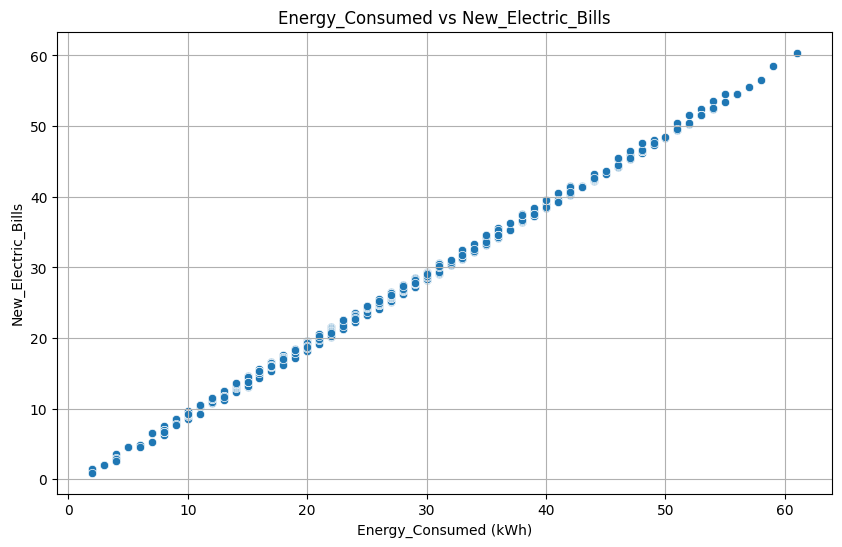

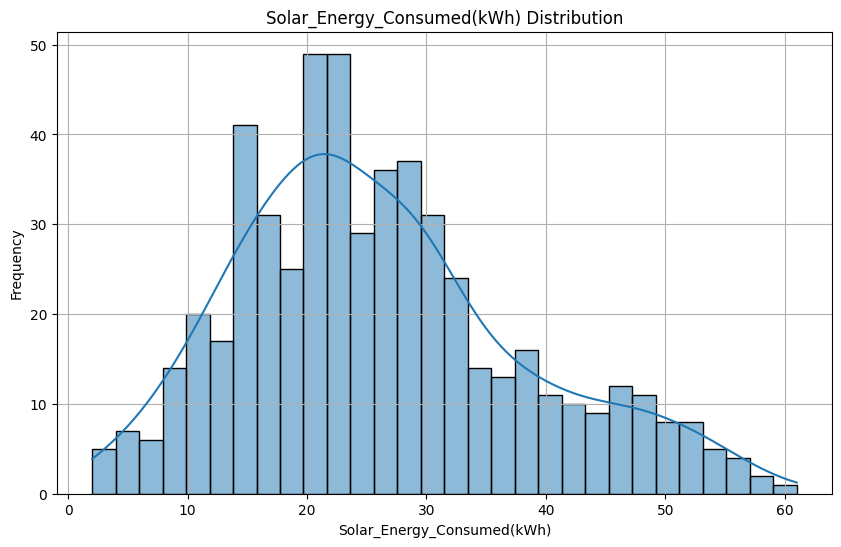

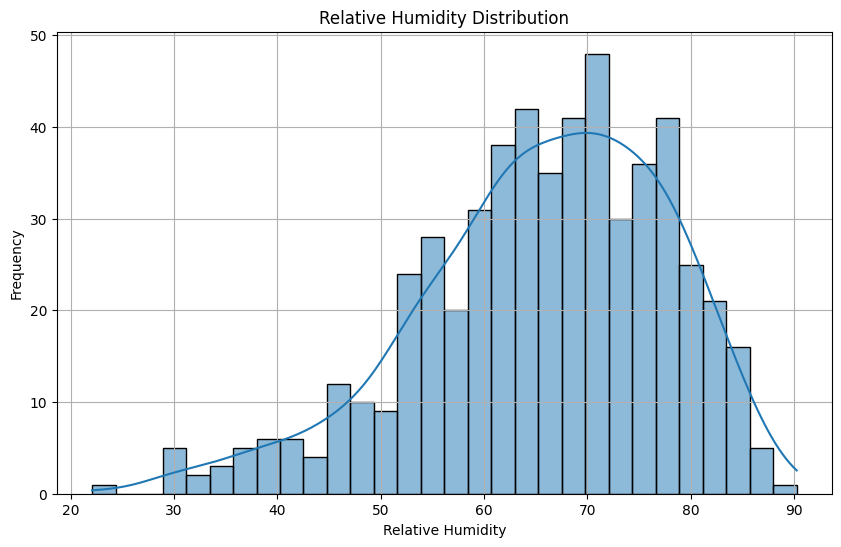

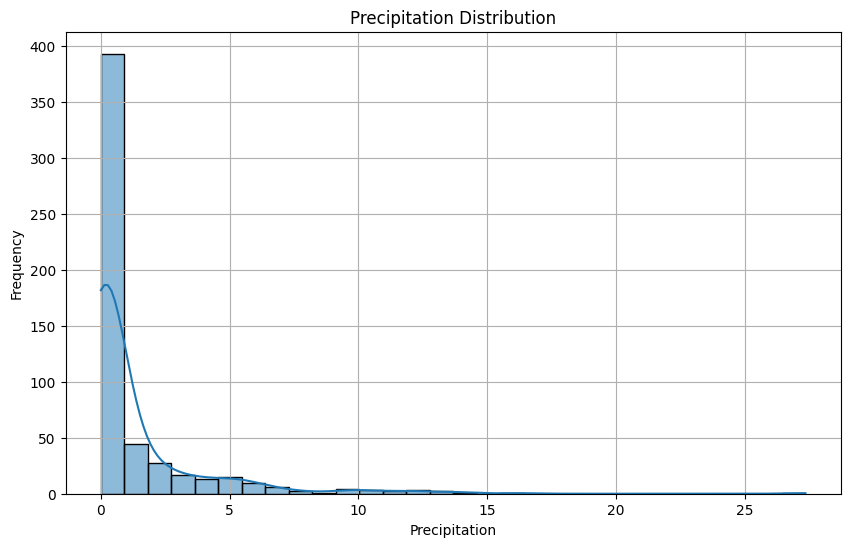

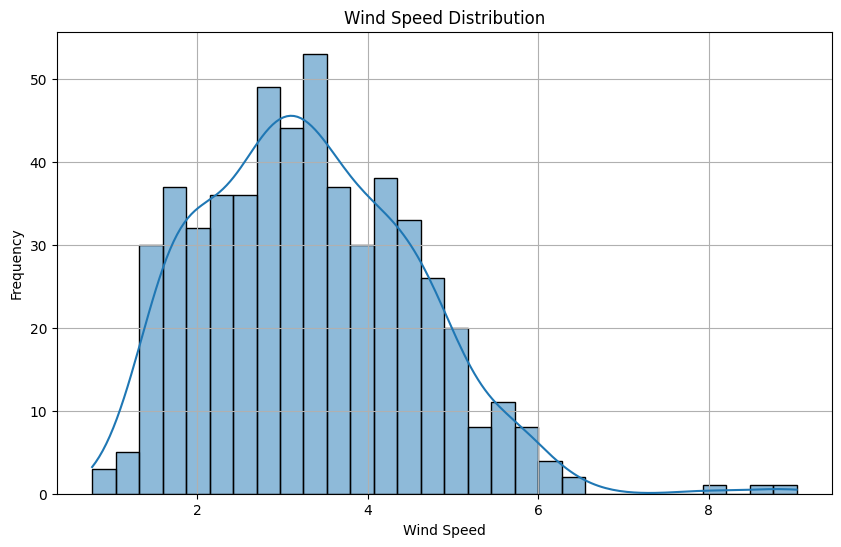

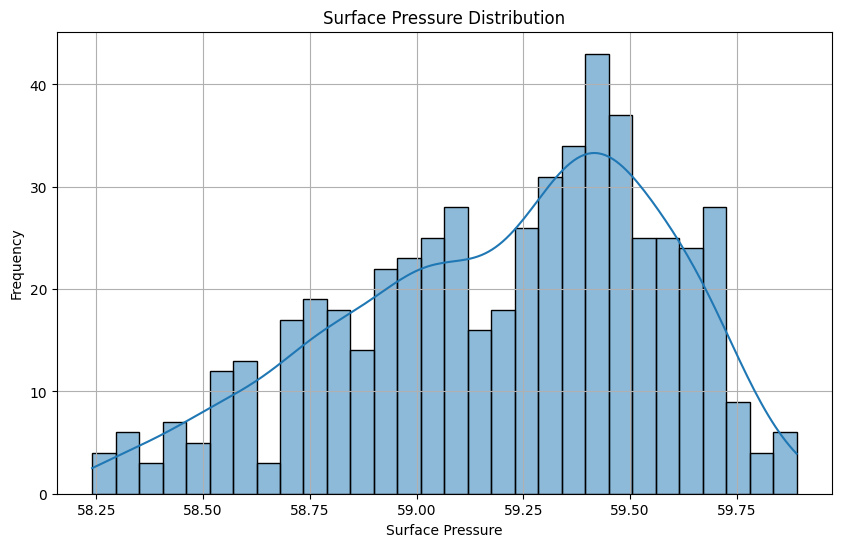

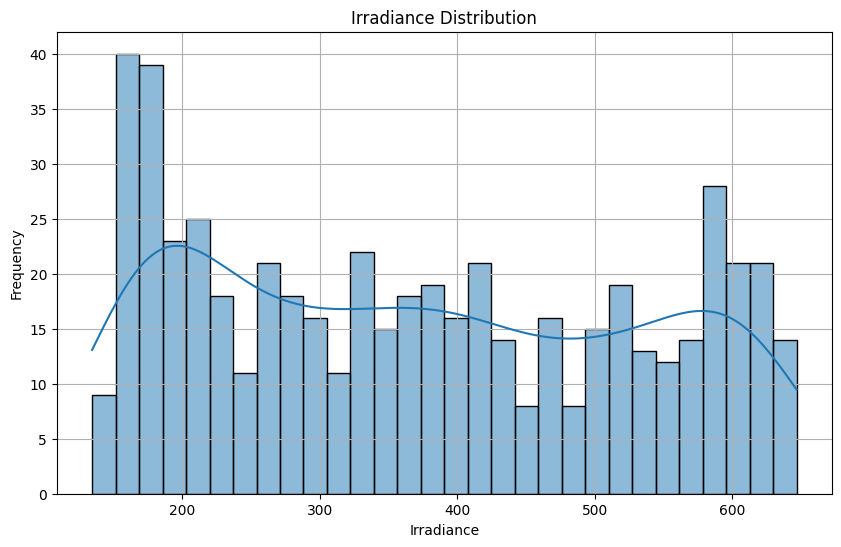

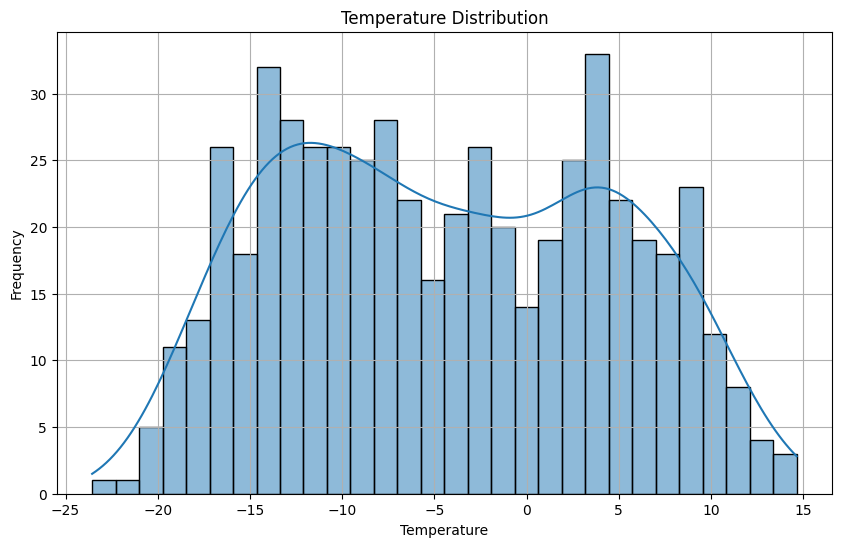

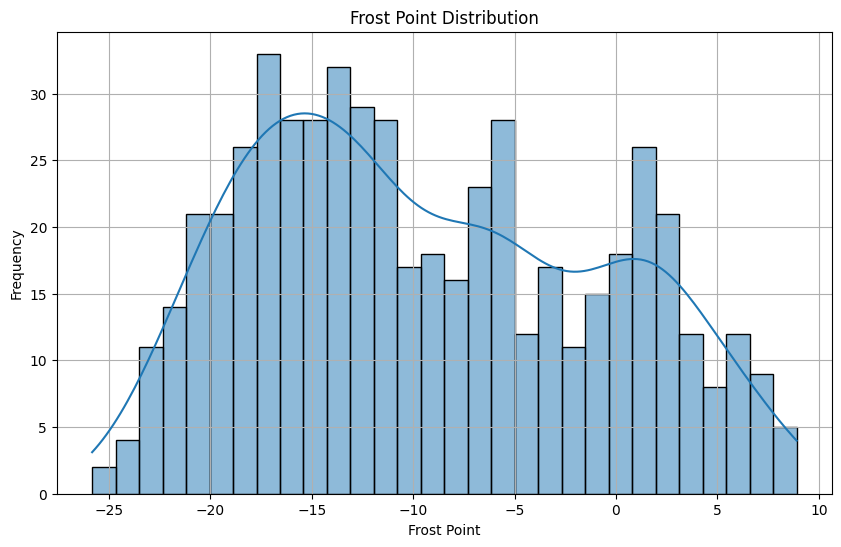

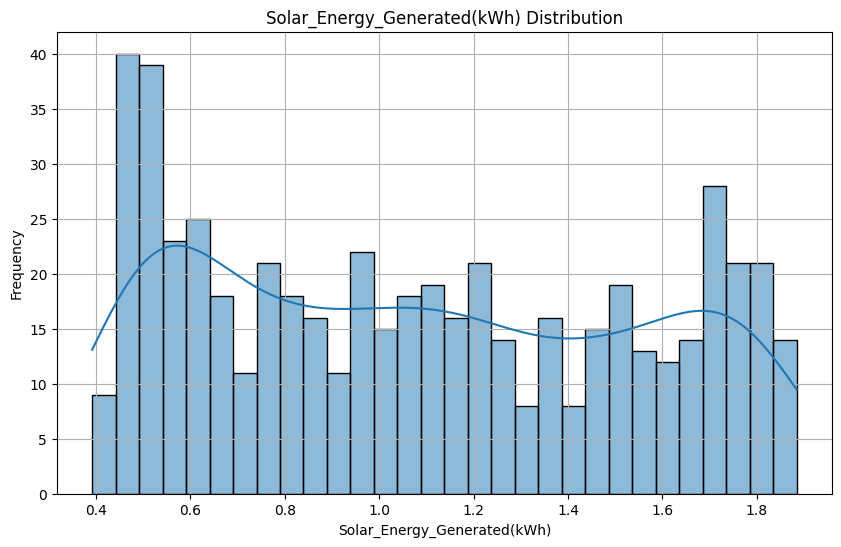

In [14]:
df = pd.read_csv(file_path)
# Scatter plot: Energy_Consumed vs New_Electric_Bills
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Solar_Energy_Consumed(kWh)', y='New_Electric_Bills')
plt.title('Energy_Consumed vs New_Electric_Bills')
plt.xlabel('Energy_Consumed (kWh)')
plt.ylabel('New_Electric_Bills')
plt.grid(True)
plt.show()

# Histograms for different features
features = ['Solar_Energy_Consumed(kWh)', 'Relative Humidity', 'Precipitation',
            'Wind Speed', 'Surface Pressure', 'Irradiance', 'Temperature', 'Frost Point', 'Solar_Energy_Generated(kWh)']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



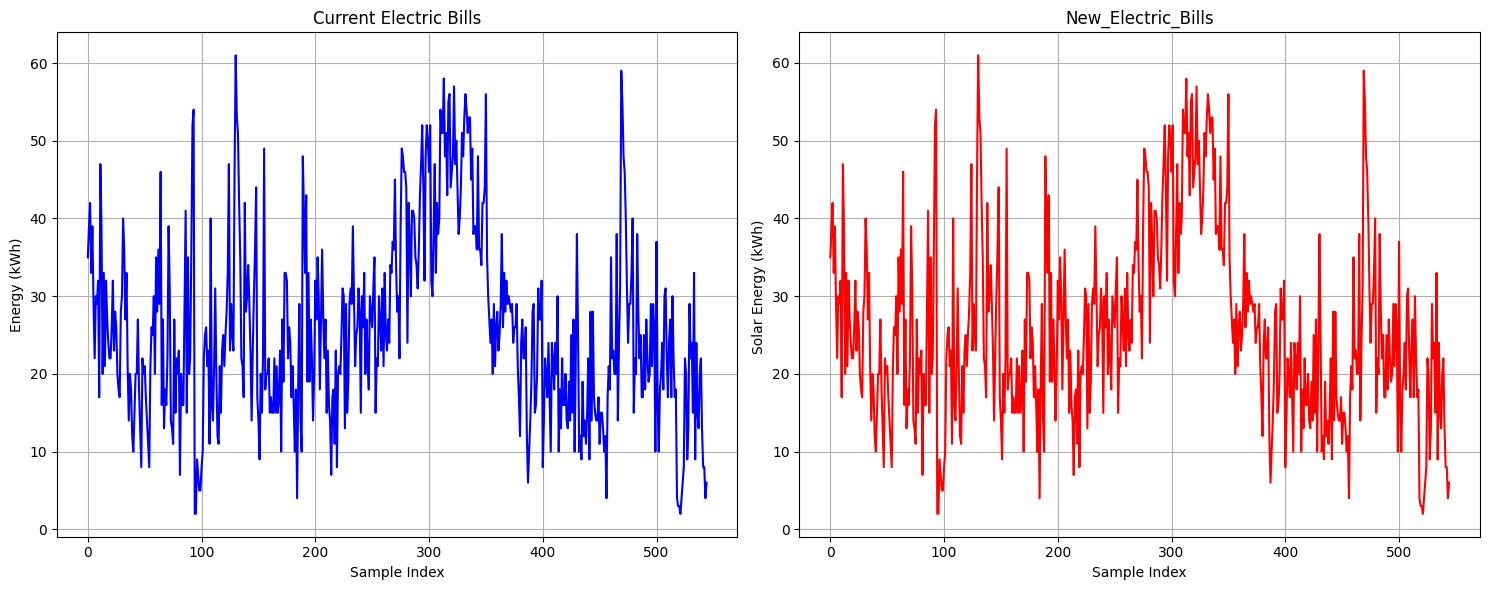

In [16]:
# Calculate Solar Energy Generated using the formula provided earlier
df['Solar_Energy_Generated(kWh)'] = (df['Irradiance'] * 0.092903 * df['Area_of_Solar_Panels(m_square)'] * 0.15) / 1000

# Calculate New Electric Bills considering Solar Energy
df['New_Electric_Bills'] = df['Solar_Energy_Consumed(kWh)'] - df['Solar_Energy_Generated(kWh)']

# Create separate line plots for Energy_Consumed and New_Electric_Bills
plt.figure(figsize=(15, 6))

# Plot Energy_Consumed
plt.subplot(1, 2, 1)
plt.plot(df.index, df['Solar_Energy_Consumed(kWh)'], color='b')
plt.title('Current Electric Bills')
plt.xlabel('Sample Index')
plt.ylabel('Energy (kWh)')
plt.grid(True)

# Plot New_Electric_Bills
plt.subplot(1, 2, 2)
plt.plot(df.index, df['New_Electric_Bills'], color='r')
plt.title('New_Electric_Bills')
plt.xlabel('Sample Index')
plt.ylabel('Solar Energy (kWh) ')
plt.grid(True)

plt.tight_layout()
plt.show()


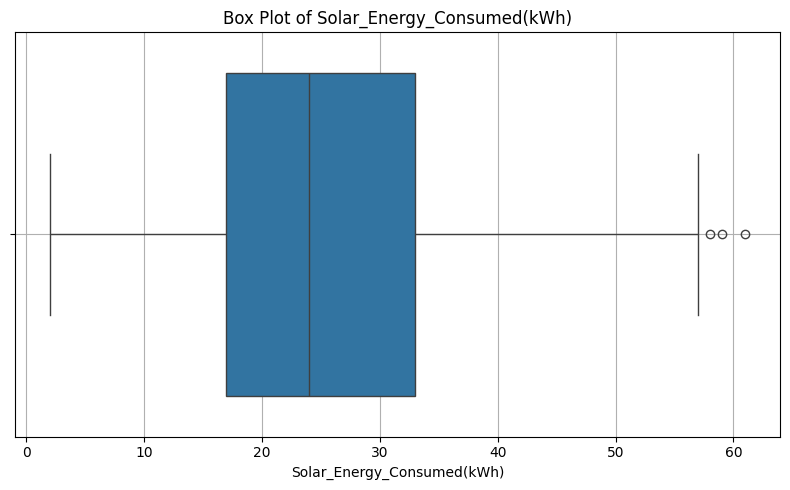

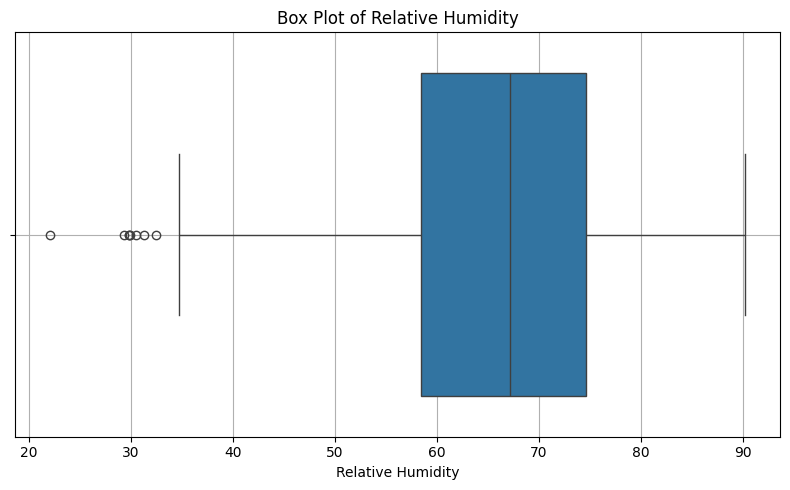

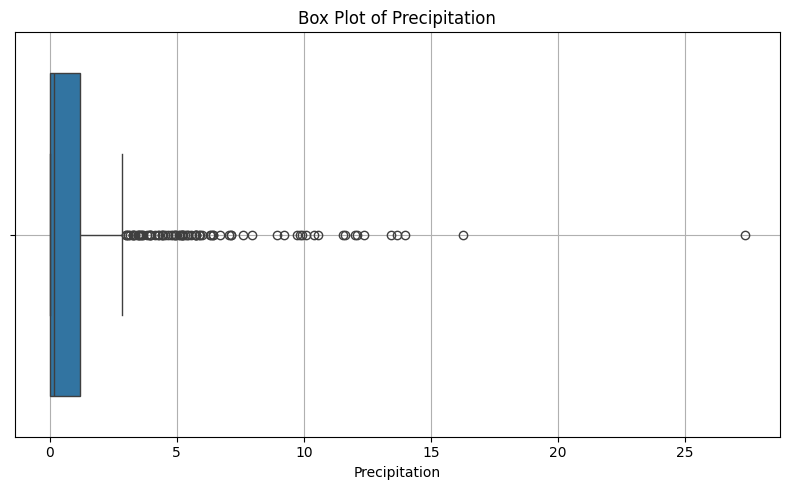

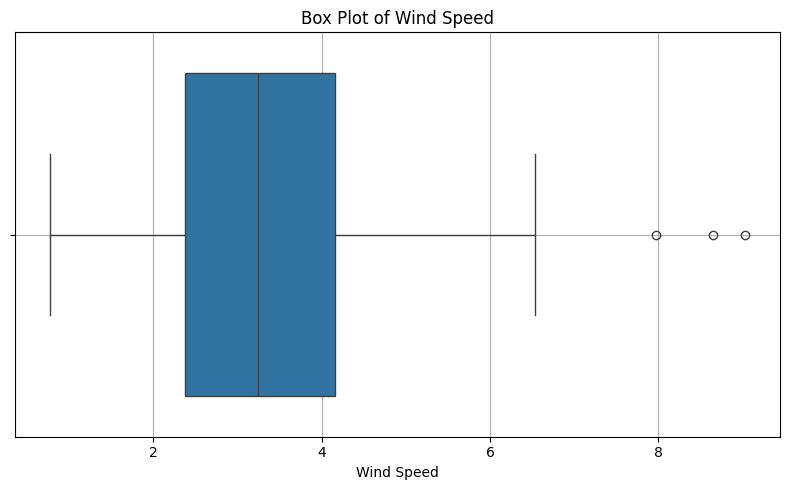

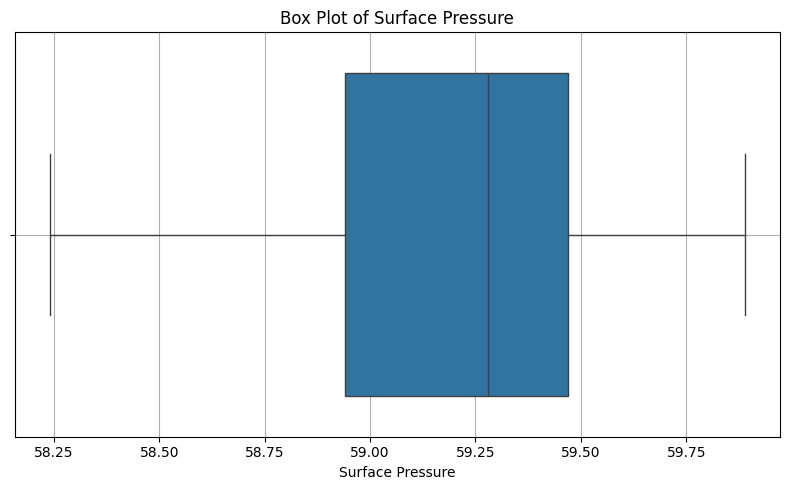

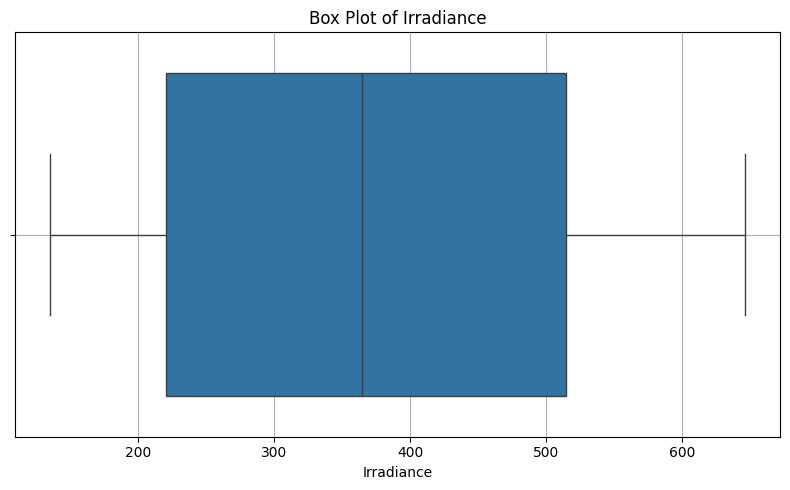

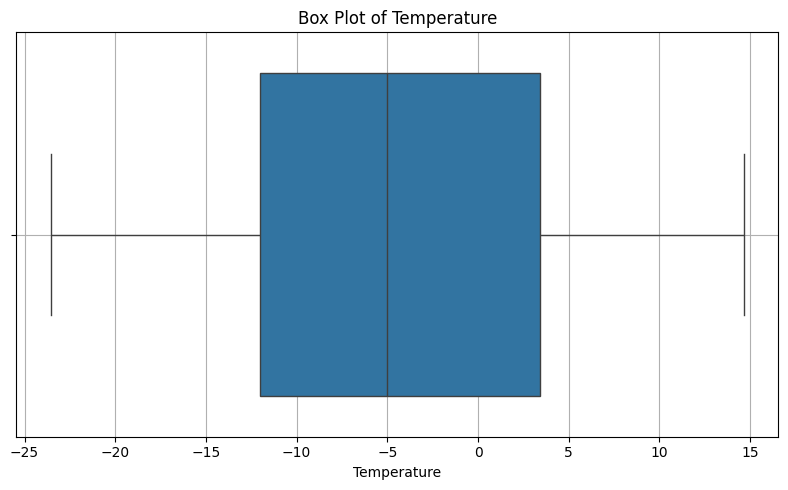

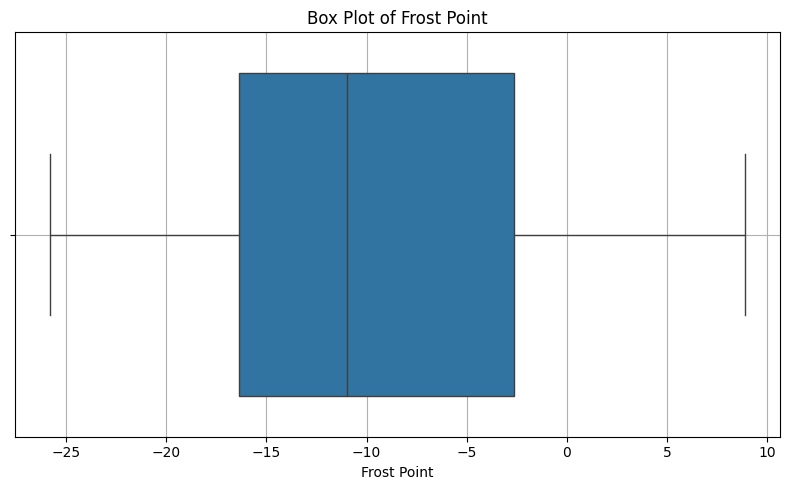

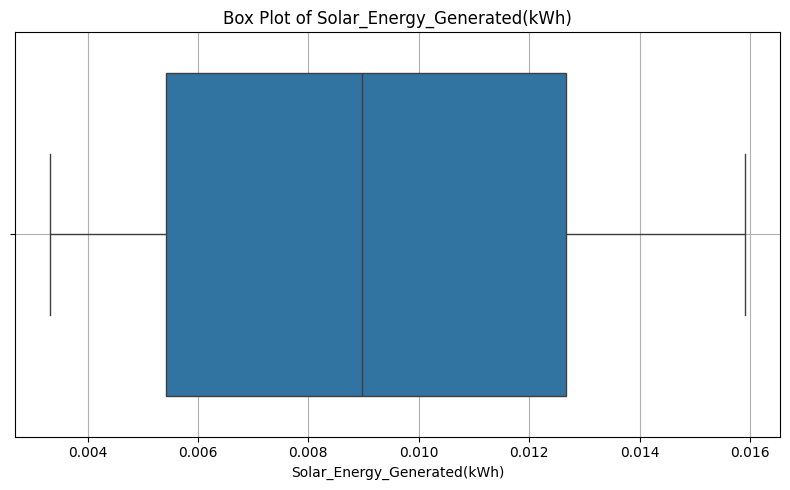

In [17]:
# Create box plots for numerical columns
for col in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
df

,Meter,High,Low,Posted,From,To,Hours,Energy_Consumed(kWh),Relative Humidity,Precipitation,Wind Speed,Surface Pressure,Area_of_Solar_Panels(m_square),Efficiency,Irradiance,Temperature,Frost Point,Solar_Energy_Generated(kWh),New_Electric_Bills
0,123114847,98,73,00:00.0,27/09/2022 05:00,27/09/2022 04:00,11,35,73.00,0.36,2.50,59.43,1.76557,0.15,423.25,3.89,0.48,0.010414,34.989586
1,123114847,98,71,00:00.0,28/09/2022 05:00,28/09/2022 04:00,11,39,73.69,3.81,3.27,59.44,1.76557,0.15,424.55,3.41,0.68,0.010446,38.989554
2,123114847,99,68,00:00.0,29/09/2022 05:00,29/09/2022 04:00,11,42,71.81,0.88,2.88,59.47,1.76557,0.15,422.75,2.83,-0.24,0.010401,41.989599
3,123114847,97,68,30:10.4,30/09/2022 05:00,30/09/2022 04:00,11,33,72.31,0.35,3.03,59.51,1.76557,0.15,416.90,3.82,0.43,0.010257,32.989743
4,123114847,97,75,30:10.0,01/10/2022 05:00,01/10/2022 04:00,11,39,71.62,0.20,2.75,59.65,1.76557,0.15,416.75,2.85,1.13,0.010254,38.989746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,123114847,79,60,30:16.0,30/03/2024 05:00,20/03/2024 04:00,11,13,76.12,2.40,3.12,58.82,1.76557,0.15,465.95,-5.98,-9.69,0.011464,12.988536
541,123114847,77,67,31:17.3,31/03/2024 05:00,21/03/2024 04:00,11,8,83.19,10.40,4.09,58.83,1.76557,0.15,472.75,-0.89,-5.26,0.011632,7.988368
542,123114847,80,65,31:54.7,01/04/2024 05:00,22/03/2024 04:00,11,8,83.25,6.35,3.45,58.97,1.76557,0.15,466.15,-3.20,-7.62,0.011469,7.988531
543,123114847,62,51,31:35.2,02/04/2024 05:00,23/03/2024 04:00,11,4,82.38,4.41,4.01,58.99,1.76557,0.15,481.75,-2.74,-8.82,0.011853,3.988147


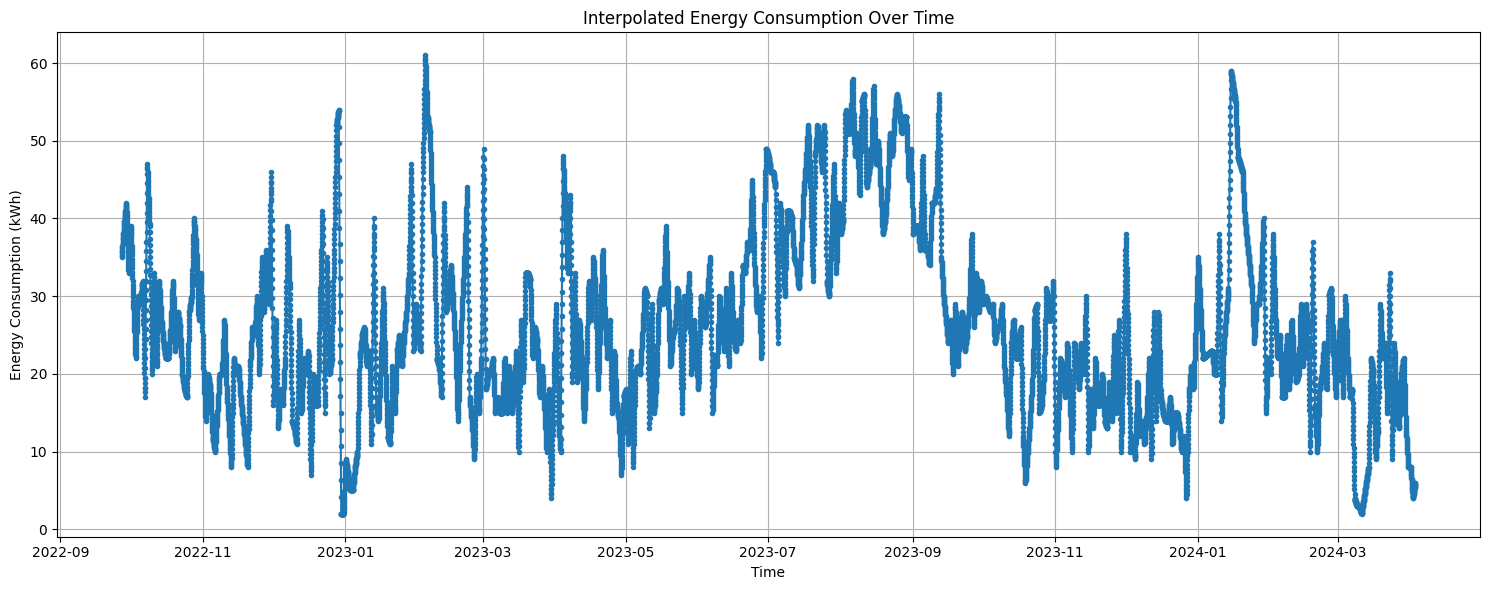

In [19]:
# Convert 'From' and 'To' columns to datetime format with dayfirst=True
df['From'] = pd.to_datetime(df['From'], dayfirst=True)
df['To'] = pd.to_datetime(df['To'], dayfirst=True)

# List of columns to remove
columns_to_remove = ['Meter', 'High', 'Low', 'Posted', 'From', 'To']

# Drop non-numeric columns
df_numeric = df.drop(columns_to_remove, axis=1)

# Set 'From' as the index for interpolation
df_numeric.set_index(df['From'], inplace=True)

# Resample and interpolate to fill missing values
df_resampled = df_numeric.resample('H').mean()  # Resample to hourly frequency
df_interpolated = df_resampled.interpolate(method='linear')  # Linear interpolation

# Time Series Line Plot for interpolated 'Energy_Consumed(kWh)'
plt.figure(figsize=(15, 6))
plt.plot(df_interpolated.index, df_interpolated['Solar_Energy_Consumed(kWh)'], marker='.', linestyle='-')
plt.title('Interpolated Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


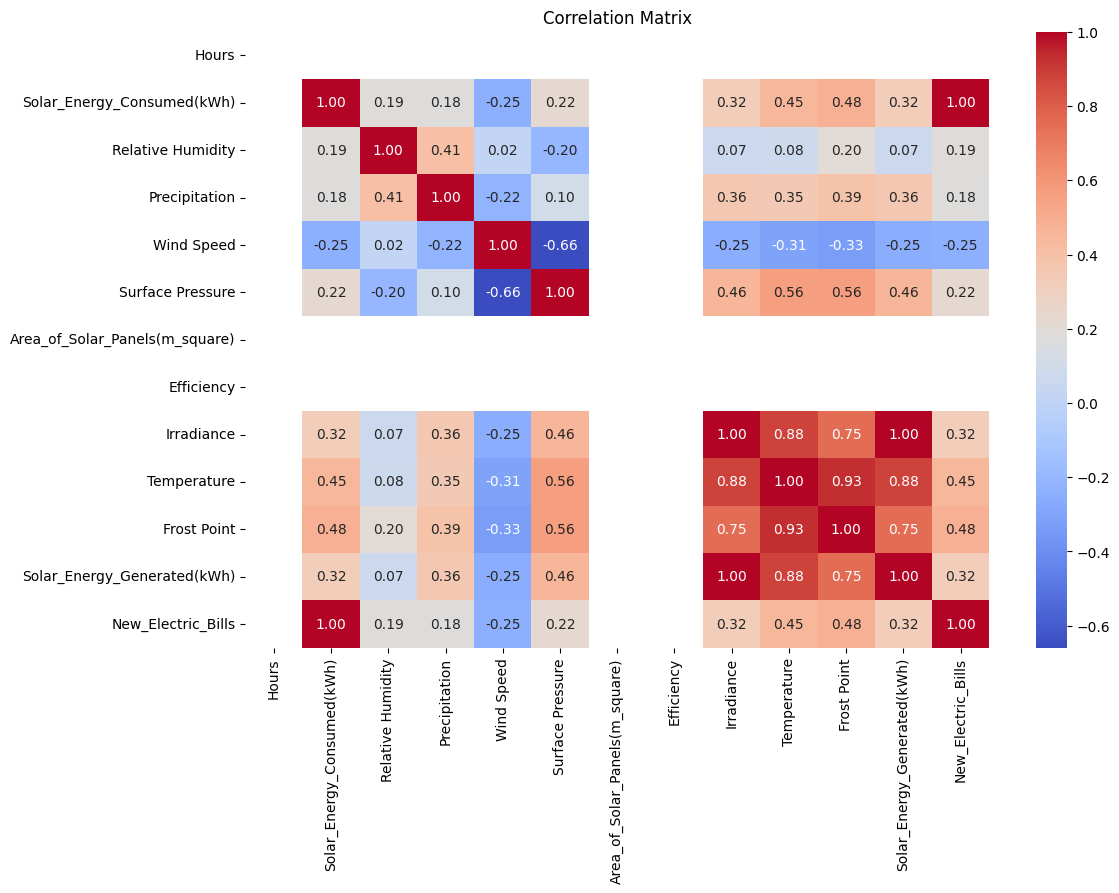

In [20]:
# Check for any remaining non-numeric columns and drop them
non_numeric_cols = df_numeric.select_dtypes(include=['object']).columns.tolist()
df_numeric.drop(non_numeric_cols, axis=1, inplace=True)

# Correlation matrix
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

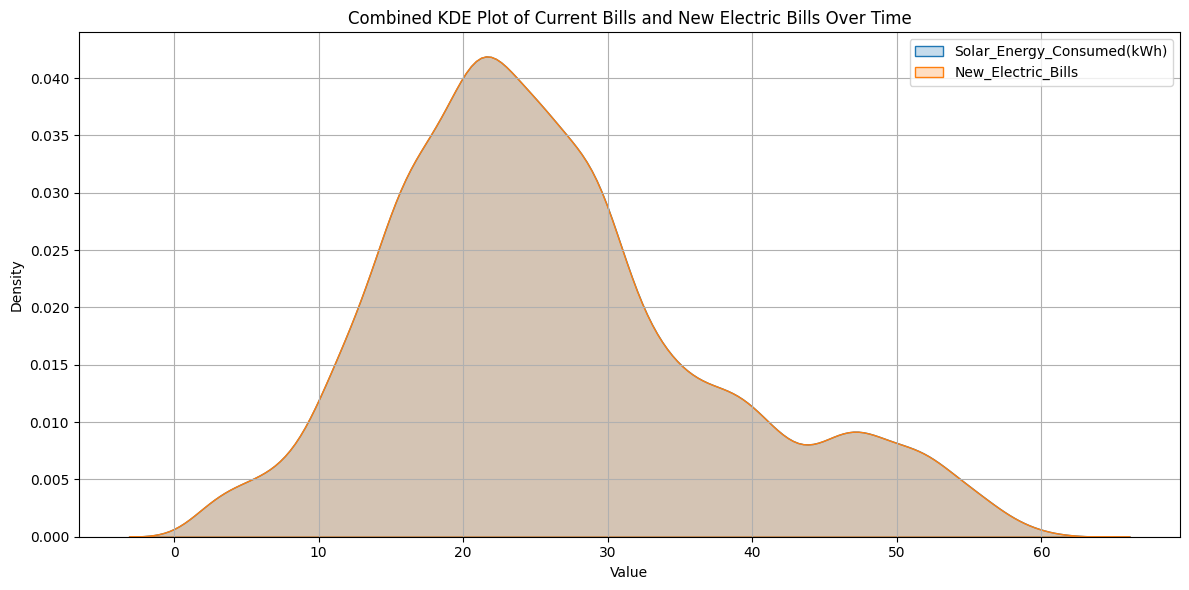

In [21]:
# Select columns for KDE plot
cols = ['Solar_Energy_Consumed(kWh)', 'New_Electric_Bills']

# Combined KDE Plot
plt.figure(figsize=(12, 6))
for col in cols:
    sns.kdeplot(data=df_interpolated[col], fill=True, label=col)

plt.title('Combined KDE Plot of Current Bills and New Electric Bills Over Time')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Data Preprocessing

# Check for Duplicate Rows and Handle them

In [22]:
# Check for Duplicate Rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [23]:
if duplicate_rows > 0:
    print(f"Number of duplicate rows: {duplicate_rows}")
    # Remove duplicate rows
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")


No duplicate rows found.


# Check for Missing Values and Handle them

In [24]:
# Check for missing values
missing_values = df_interpolated.isnull().sum()
missing_values



Hours                             0
Solar_Energy_Consumed(kWh)        0
Relative Humidity                 0
Precipitation                     0
Wind Speed                        0
Surface Pressure                  0
Area_of_Solar_Panels(m_square)    0
Efficiency                        0
Irradiance                        0
Temperature                       0
Frost Point                       0
Solar_Energy_Generated(kWh)       0
New_Electric_Bills                0
dtype: int64

In [25]:
# Print columns with missing values
if not missing_values.empty:
    print("Columns with Missing Values:")
    print(missing_values)

# Fill missing values with mean
df_interpolated.fillna(df_interpolated.mean(), inplace=True)

Columns with Missing Values:
Hours                             0
Solar_Energy_Consumed(kWh)        0
Relative Humidity                 0
Precipitation                     0
Wind Speed                        0
Surface Pressure                  0
Area_of_Solar_Panels(m_square)    0
Efficiency                        0
Irradiance                        0
Temperature                       0
Frost Point                       0
Solar_Energy_Generated(kWh)       0
New_Electric_Bills                0
dtype: int64


# Correlation of Features

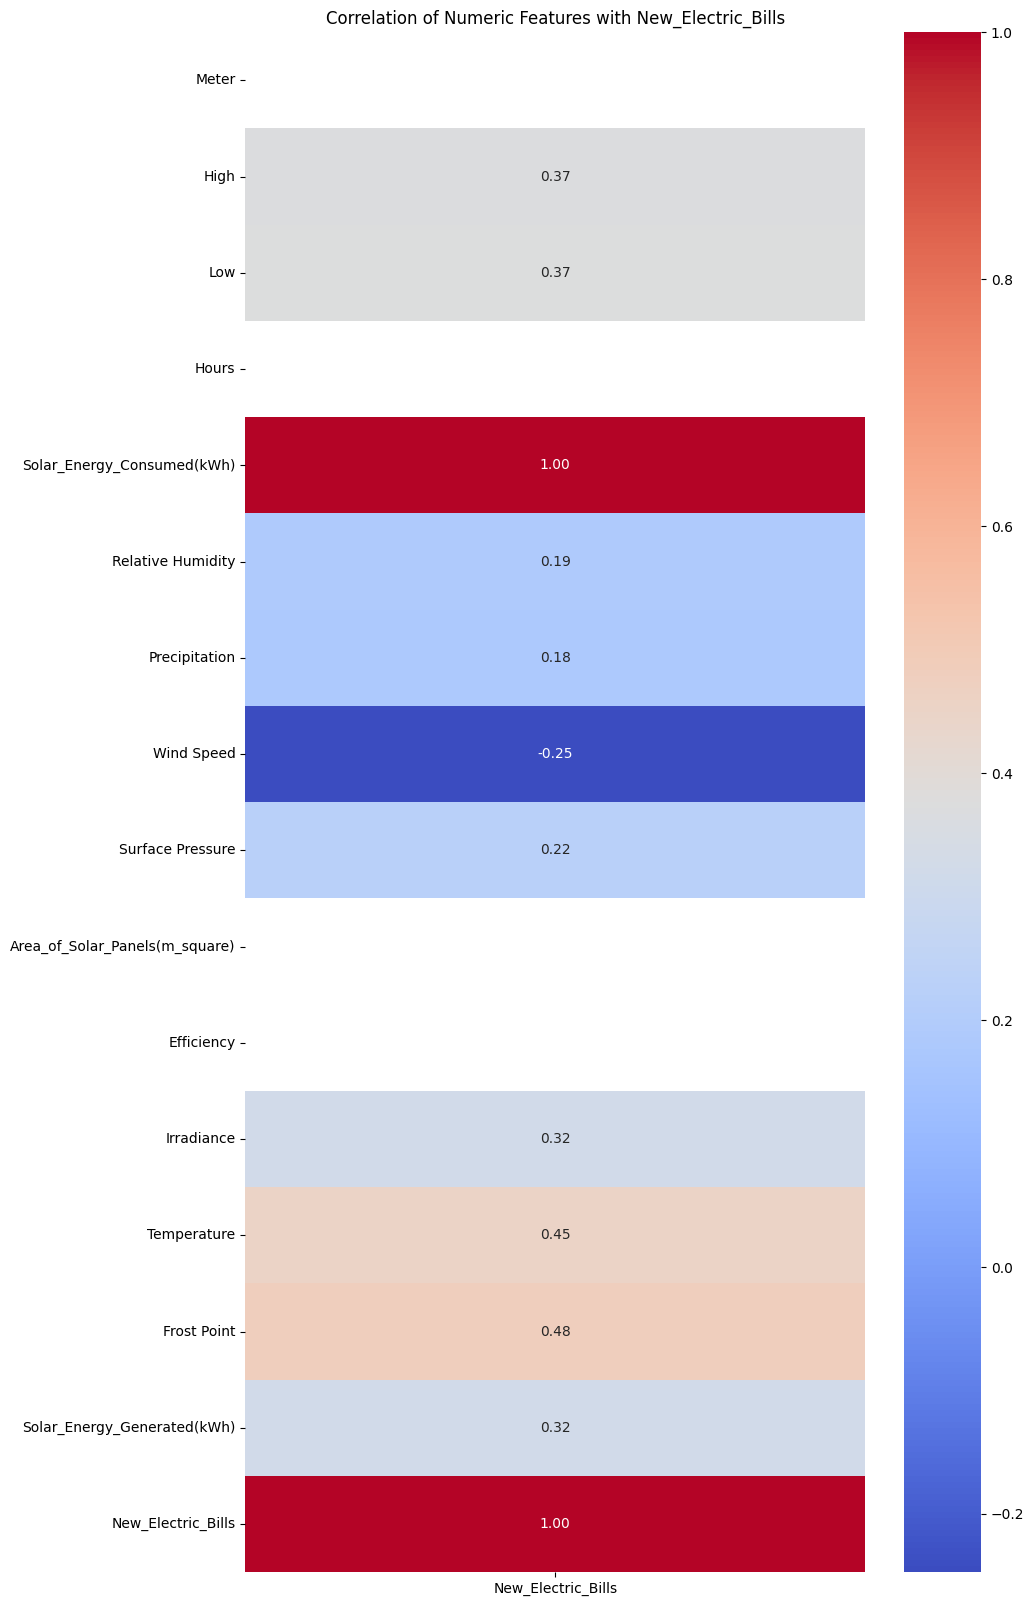

In [26]:
plt.figure(figsize=[10,20])
plt.style.use('default')

# Select only numeric columns
df_numeric = df._get_numeric_data()

# Compute correlation
corr = df_numeric.corr()[['New_Electric_Bills']]

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Numeric Features with New_Electric_Bills')
plt.show()


# Select Features and Target

In [27]:
# List of columns to remove
columns_to_remove = ['Meter', 'High', 'Low', 'Posted','From', 'To','Hours','Area_of_Solar_Panels(m_square)',  'Efficiency']

# Separate features and target variable
X = df.drop(['New_Electric_Bills'] + columns_to_remove, axis=1)  # Features
y = df['New_Electric_Bills']  # Target variable



# Data Normalization

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Display first few rows of normalized features
print("First few rows of normalized features:")
print(X_normalized_df.head())


First few rows of normalized features:
   Solar_Energy_Consumed(kWh)  Relative Humidity  Precipitation  Wind Speed  \
0                    0.559322           0.747030       0.013158    0.209443   
1                    0.627119           0.757149       0.139254    0.302663   
2                    0.677966           0.729579       0.032164    0.255448   
3                    0.525424           0.736912       0.012792    0.273608   
4                    0.627119           0.726793       0.007310    0.239709   

   Surface Pressure  Irradiance  Temperature  Frost Point  \
0          0.721212    0.563523     0.718398     0.757340   
1          0.727273    0.566061     0.705836     0.763097   
2          0.745455    0.562546     0.690657     0.736615   
3          0.769697    0.551123     0.716566     0.755901   
4          0.854545    0.550830     0.691180     0.776051   

   Solar_Energy_Generated(kWh)  
0                     0.563523  
1                     0.566061  
2                   

In [29]:
X_normalized

array([[0.55932203, 0.74703036, 0.01315789, ..., 0.71839833, 0.75734024,
        0.56352275],
       [0.62711864, 0.75714914, 0.13925439, ..., 0.70583617, 0.76309729,
        0.56606132],
       [0.6779661 , 0.72957912, 0.03216374, ..., 0.6906569 , 0.73661485,
        0.56254638],
       ...,
       [0.10169492, 0.89734565, 0.23209064, ..., 0.53284481, 0.52417962,
        0.64729545],
       [0.03389831, 0.88458718, 0.16118421, ..., 0.54488354, 0.48963731,
        0.67775825],
       [0.06779661, 0.80847632, 0.14619883, ..., 0.51216959, 0.50402994,
        0.70542863]])

In [30]:
X_normalized.shape

(545, 9)

# Split Train and Test Data

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (436, 9)
X_test shape: (109, 9)
y_train shape: (436,)
y_test shape: (109,)


# Machine Learning Algorithms

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor with hyperparameters
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on training data
gbr.fit(X_train, y_train)

# Predict on test data
y_pred_gbr = gbr.predict(X_test)


In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor with hyperparameters
rfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model on training data
rfr.fit(X_train, y_train)

# Predict on test data
y_pred_rfr = rfr.predict(X_test)


In [34]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Regressor with hyperparameters
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model on training data
dtr.fit(X_train, y_train)

# Predict on test data
y_pred_dtr = dtr.predict(X_test)


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE for each model
mape_gbr = calculate_mape(y_test, y_pred_gbr)
mape_rfr = calculate_mape(y_test, y_pred_rfr)
mape_dtr = calculate_mape(y_test, y_pred_dtr)


# Calculate RMSE for each model
rmse_gbr = calculate_rmse(y_test, y_pred_gbr)
rmse_rfr = calculate_rmse(y_test, y_pred_rfr)
rmse_dtr = calculate_rmse(y_test, y_pred_dtr)


# Evaluate Gradient Boosting
print("Gradient Boosting:")
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("MSE:", mean_squared_error(y_test, y_pred_gbr))
print("RMSE:", rmse_gbr)
print("R^2:", r2_score(y_test, y_pred_gbr))
print("MAPE:", mape_gbr)
print()

# Evaluate Random Forest
print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rfr))
print("MSE:", mean_squared_error(y_test, y_pred_rfr))
print("RMSE:", rmse_rfr)
print("R^2:", r2_score(y_test, y_pred_rfr))
print("MAPE:", mape_rfr)
print()

# Evaluate Decision Tree
print("Decision Tree:")
print("MAE:", mean_absolute_error(y_test, y_pred_dtr))
print("MSE:", mean_squared_error(y_test, y_pred_dtr))
print("RMSE:", rmse_dtr)
print("R^2:", r2_score(y_test, y_pred_dtr))
print("MAPE:", mape_dtr)


Gradient Boosting:
MAE: 0.004249016866327342
MSE: 0.00016583743478795478
RMSE: 0.01287778842767479
R^2: 0.99999841348
MAPE: 0.015514023337539682

Random Forest:
MAE: 0.030323927598360043
MSE: 0.008545954449627968
RMSE: 0.09244433162518927
R^2: 0.9999182432623177
MAPE: 0.2140582644320091

Decision Tree:
MAE: 0.3597848787319212
MSE: 0.20177629243096865
RMSE: 0.44919516073859106
R^2: 0.9980696630776574
MAPE: 2.158783924279674


In [36]:
from sklearn.metrics import r2_score

# Calculate MAE, MAPE, RMSE, and R-squared for each model
metrics = {
    'MAE': [mean_absolute_error(y_test, y_pred_gbr), mean_absolute_error(y_test, y_pred_rfr), mean_absolute_error(y_test, y_pred_dtr)],
    'MAPE': [calculate_mape(y_test, y_pred_gbr), calculate_mape(y_test, y_pred_rfr), calculate_mape(y_test, y_pred_dtr)],
    'RMSE': [calculate_rmse(y_test, y_pred_gbr), calculate_rmse(y_test, y_pred_rfr), calculate_rmse(y_test, y_pred_dtr)],
    'R-squared': [r2_score(y_test, y_pred_gbr), r2_score(y_test, y_pred_rfr), r2_score(y_test, y_pred_dtr)]
}

# Create DataFrame from metrics
import pandas as pd

metrics_df = pd.DataFrame(metrics, index=['Gradient Boosting', 'Random Forest', 'Decision Tree'])
print(metrics_df)


                        MAE      MAPE      RMSE  R-squared
Gradient Boosting  0.004249  0.015514  0.012878   0.999998
Random Forest      0.030324  0.214058  0.092444   0.999918
Decision Tree      0.359785  2.158784  0.449195   0.998070


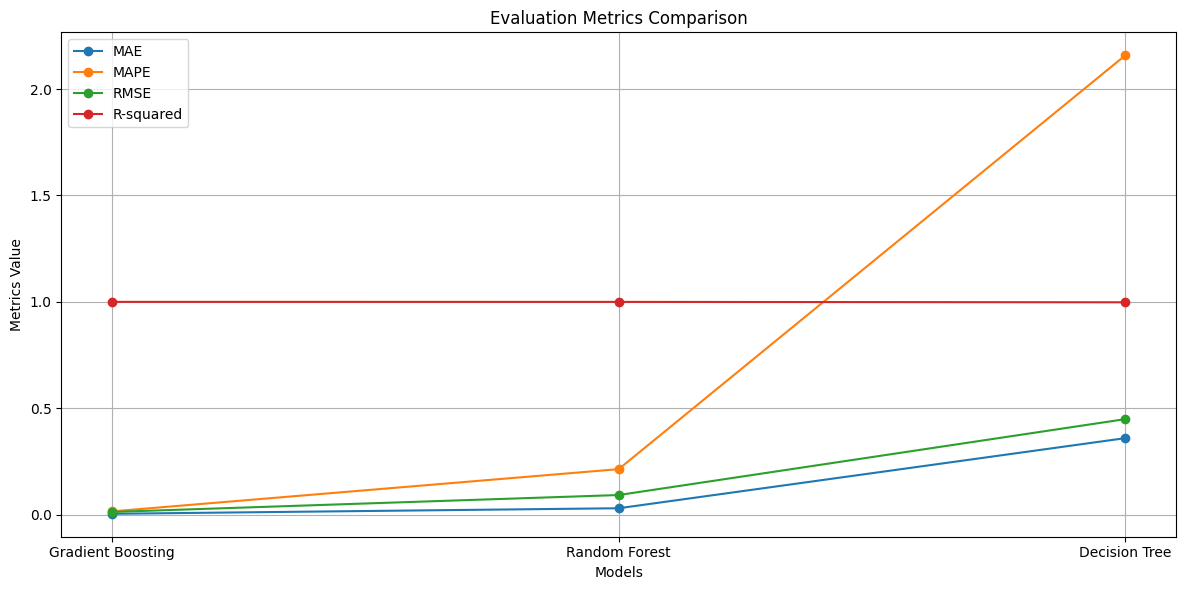

In [37]:
# Create line plot for evaluation metrics
plt.figure(figsize=(12, 6))

for metric in metrics_df.columns:
    plt.plot(metrics_df.index, metrics_df[metric], marker='o', label=metric)

plt.title('Evaluation Metrics Comparison')
plt.xlabel('Models')
plt.ylabel('Metrics Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Deep Learning Algorithms

In [38]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2753 (10.75 KB)
Trainable params: 2753 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
11/11 [==============================] - 1s 25ms/step - loss: 826.7946 - mae: 25.9096 - val_loss: 876.3730 - val_mae: 26.9764
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 803.2933 - mae: 25.4969 - val_loss: 849.5732 - val_mae: 26.5110
Epoch 3/50
11/11 [==============================] - 0s 6ms/step - loss: 773.5755 - mae: 24.9455 - val_loss: 810.4258 - val_mae: 25.8157
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 728.6092 - mae: 24.0983 - val_loss: 752.9965 - val_mae: 24.7590
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 663.7813 - mae: 22.7933 - val_loss: 667.1302 - val_mae: 23.0867
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 567.8821 - mae: 20.8080 - val_loss: 551.0870 - val_mae: 20.6112
Epoch 7/50
11/11 [==============================] - 0s 7ms/step - loss: 446.0111 - mae: 18.0444 - val_loss: 415.4878 - val_mae: 17.4784
Epoch 8/50
11/11 [=============================

In [40]:
# Predict on test data
y_pred_dl = model.predict(X_test)

# Calculate evaluation metrics
mae_dl = mean_absolute_error(y_test, y_pred_dl)
mse_dl = mean_squared_error(y_test, y_pred_dl)
rmse_dl = np.sqrt(mse_dl)
r2_dl = r2_score(y_test, y_pred_dl)

print("MAE (Deep Learning):", mae_dl)
print("MSE (Deep Learning):", mse_dl)
print("RMSE (Deep Learning):", rmse_dl)
print("R-squared (Deep Learning):", r2_dl)

4/4 [==============================] - 0s 3ms/step
MAE (Deep Learning): 1.4015193635761958
MSE (Deep Learning): 3.0093431993355306
RMSE (Deep Learning): 1.734745860158061
R-squared (Deep Learning): 0.9712104617460682


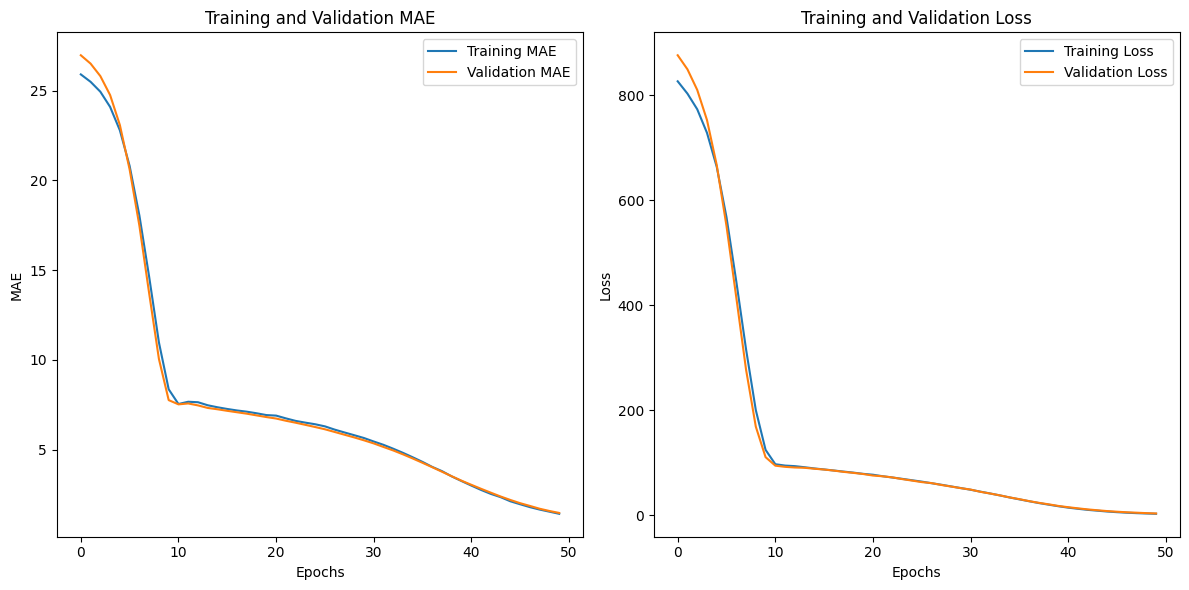

In [41]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot MAE
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
